<h1><b>Tarea 3: Ajuste de datos experimentales<b></h1>

---
<div align="right">
<font size=2>
Estiven Castrillón Alzate<br>
Institute of Physics<br>
</font>
</div>

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.optimize import curve_fit
from math import radians

**Ignorar**

Funciones para gráficas de autoría propia basadas en @GuillaumeWein: https://towardsdatascience.com/5-steps-to-build-beautiful-bar-charts-with-python-3691d434117a

In [36]:
def linegraph(x, y, xtitle: str, ytitle: str, logscale: bool=False, main_title: str=None, main_subtitle: str=None, graph_title: str=None, type_graph: list=['scatter', 'plot'], source: str=None, y_variable_label: str=None, error_bars_values: list=None, xlabels=None, ylabels=None,ax=None):
    """This functions takes x and y values and turn them into a nice-looking line plot from matplotlib


    Args:
        x (pandas.Series): The data that will go to x label

        y (pandas.Series): The data that will go to y label

        xtitle (str): title of x label

        ytitle (str): title of y label

        main_title (str, optional): Text of main title. Default to None. (Main title and main subtitle works better for subplots)

        main_subtitle (str, optional): Default to None. (Main title and main subtitle works better for subplots)

        graph_title (str, optional): Individual title for graphs. Default to None.

        source (str, optional): Source of information where the data comes from. Default to None.

        xlabels (list of str, optional): What names do you want to put on every bar on the x axis. Default to None.

        ylabels (list of str, optional): What names do you want to put on the scale of y axis, mainly this will go None. Default to None.

        ax (ax, optional): It is used mainly to specify axis on subplots. Default to None.

    """
    if type_graph == 'scatter':
        bar = ax.errorbar(x, y, yerr=error_bars_values, color='#162D59', label=y_variable_label, fmt='o')
    elif type_graph == 'plot':
        bar = ax.plot(x, y, color='#BABCBF', label=y_variable_label)


    # Reformat x-axis label and tick labels
    ax.set_xlabel(xtitle, fontsize=12, labelpad=10) # No need for an axis label
    ax.xaxis.set_label_position("bottom")
    ax.xaxis.set_tick_params(labelbottom=True, bottom=True, labelsize=12, labelrotation=0)
    if xlabels:
        ax.set_xticks(x, xlabels) # Map integers numbers from the series to labels list

    # Reformat y-axis
    ax.set_ylabel(ytitle, fontsize=12, labelpad=10)
    ax.yaxis.set_label_position("left")
    ax.yaxis.set_tick_params(pad=2, labeltop=False, labelbottom=True, bottom=False, labelsize=12)
    if ylabels:
        ax.set_xticks(y, ylabels) # Map integers numbers from the series to labels list

    # Log scale, if needed
    if logscale:
        ax.set_xscale('log')
        ax.set_yscale('log')
        ax.set_xlim(0.1, 1)  # Establecer límites en el eje X
        # ax.set_ylim(0, np.log(10))  # Establecer límites en el eje Y
    else:
        ax.set_xlim(0, max(x) * 1.1)
        ax.set_ylim(0, max(y) * 1.1)

    # Remove the spines
    ax.spines[['top','left','bottom','right']].set_visible(False)

    # Make the left spine thicker
    ax.spines['right'].set_linewidth(1.1)

    # Graph title
    ax.set_title(graph_title, pad=1)

    # Add in title and subtitle
    ax.text(x=0.12, y=.99, s=main_title, transform=fig.transFigure, ha='left', fontsize=14, weight='bold', alpha=.8)
    ax.text(x=0.12, y=.90, s=main_subtitle, transform=fig.transFigure, ha='left', fontsize=12, alpha=.8)

    # Set source text
    if source:
        ax.text(x=0.1, y=0, s=f'Source: {source}', transform=fig.transFigure, ha='left', fontsize=10, alpha=.7)

    # Adjust the margins around the plot area
    plt.subplots_adjust(left=None, right=None, wspace=None, hspace=0.4)

    # Minor adjustments
    ax.legend(loc='upper left')
    ax.grid(alpha=0.5, linestyle='--')

La incertidumbre de los instrumentos son las siguientes:
- Cronómetro, (medidas de periodos) = $\pm 0.01 \space \text{s}$
- Flexómetro, (longitudes de péndulos) = $\pm 0.1 \space \text{m}$

**Nota:** Las siguientes medidas de tiempo en péndulos fueron medidas con 10 oscilaciones y con la longitud expresada en los nombres de las columnas

In [37]:
# raw_data = pd.read_excel('/content/datos_periodos_diez_osc_tarea3 (1).xlsx')
raw_data_json = '{"0.18m":{"0":8.54,"1":8.49,"2":8.77,"3":8.88,"4":8.48,"5":8.52,"6":8.58,"7":8.46,"8":8.77,"9":8.67},"0.29m":{"0":10.9,"1":10.96,"2":10.98,"3":10.91,"4":10.99,"5":11.0,"6":10.91,"7":10.98,"8":11.02,"9":10.82},"0.39m":{"0":12.59,"1":12.64,"2":12.75,"3":12.51,"4":12.51,"5":12.69,"6":12.63,"7":12.62,"8":12.62,"9":12.6},"0.51m":{"0":14.57,"1":14.34,"2":14.42,"3":14.41,"4":14.54,"5":14.38,"6":14.52,"7":14.48,"8":14.43,"9":14.37},"0.62m":{"0":15.97,"1":15.96,"2":15.71,"3":15.81,"4":15.93,"5":15.91,"6":15.96,"7":15.8,"8":15.84,"9":15.87},"0.87m":{"0":18.54,"1":18.64,"2":18.39,"3":18.5,"4":18.73,"5":18.45,"6":18.66,"7":18.74,"8":18.51,"9":18.66}}'
raw_data = pd.read_json(raw_data_json)
print('Datos de periodos tomados con diferentes longitudes del péndulo')
raw_data.head(2)

Datos de periodos tomados con diferentes longitudes del péndulo


,0.18m,0.29m,0.39m,0.51m,0.62m,0.87m
0,8.54,10.90,12.59,14.57,15.97,18.54
1,8.49,10.96,12.64,14.34,15.96,18.64


Dataframe de periodos

In [38]:
# Dividiendo entre 10 para obtener el periodo, ya que fueron 10 oscilaciones medidas
periodo_data = raw_data / 10
periodo_data.head(2)

# Dataframe de los promedios de los periodos
promedios_periodos = pd.DataFrame(periodo_data.mean().reset_index())
promedios_periodos.columns = ['longitud_pendulo', 'promedio_periodo']

# Tomando solamente las longitudes y no las unidades de medida
promedios_periodos['longitud_pendulo'] = promedios_periodos['longitud_pendulo'].apply(lambda x: x[:4]) \
                                                                               .astype('float64')
print('Datos con los que se trabajará de ahora en adelante:')
promedios_periodos

Datos con los que se trabajará de ahora en adelante:


,longitud_pendulo,promedio_periodo
0,0.18,0.8616
1,0.29,1.0947
2,0.39,1.2616
3,0.51,1.4446
4,0.62,1.5876
5,0.87,1.8582


1-2. **Grafique los datos obtenidos. Verifique visualmente que sus datos presenten el comportamiento esperado. Linearice la expresión del modelo de forma tal exista una relación lineal entre las variables que se grafican.**

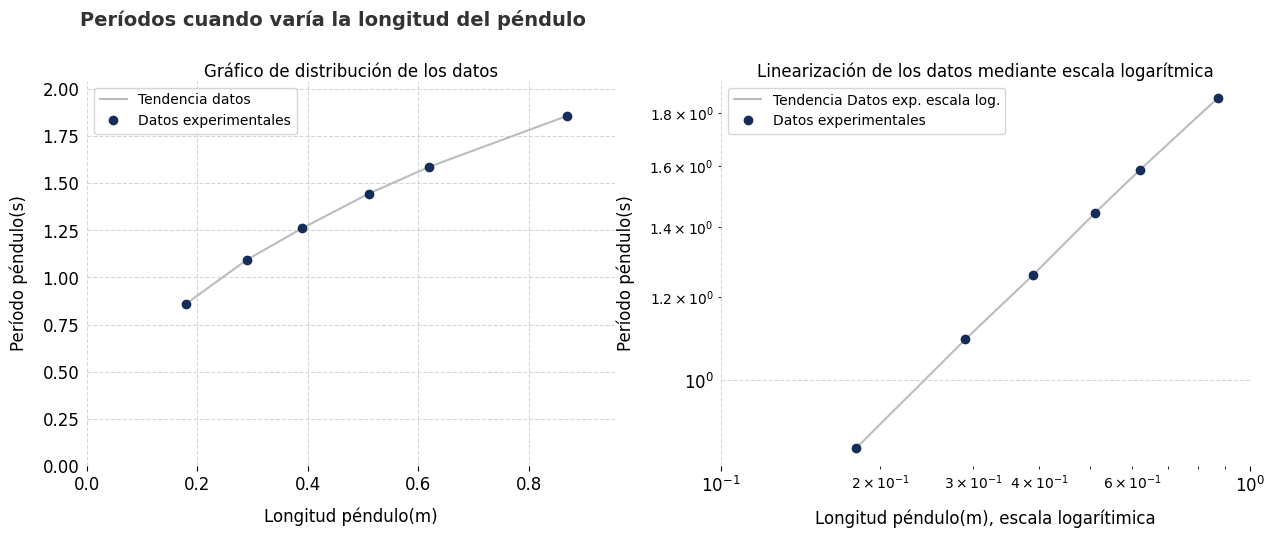

In [39]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 5))

linegraph(x=promedios_periodos['longitud_pendulo'],
        y=promedios_periodos['promedio_periodo'],
        xtitle='Longitud péndulo(m)',
        ytitle='Período péndulo(s)',
        main_title='Períodos cuando varía la longitud del péndulo',
        type_graph='scatter',
        y_variable_label='Datos experimentales',
        ax=ax1)

linegraph(x=promedios_periodos['longitud_pendulo'],
        y=promedios_periodos['promedio_periodo'],
        xtitle='Longitud péndulo(m)',
        ytitle='Período péndulo(s)',
        type_graph='plot',
        y_variable_label='Tendencia datos',
        graph_title='Gráfico de distribución de los datos',
        ax=ax1)

linegraph(x=promedios_periodos['longitud_pendulo'],
        y=promedios_periodos['promedio_periodo'],
        logscale=True,
        xtitle='Longitud péndulo(m)',
        ytitle='Período péndulo(s)',
        type_graph='plot',
        y_variable_label='Tendencia Datos exp. escala log.',
        ax=ax2)

linegraph(x=promedios_periodos['longitud_pendulo'],
        y=promedios_periodos['promedio_periodo'],
        logscale=True,
        xtitle='Longitud péndulo(m), escala logarítimica',
        ytitle='Período péndulo(s)',
        type_graph='scatter',
        y_variable_label='Datos experimentales',
        graph_title='Linearización de los datos mediante escala logarítmica',
        ax=ax2)

plt.show()

***NOTA: Los gráficos de líneas NO SON AJUSTES, son líneas de tendencia que unen los puntos dados por los datos experimentales***

3. **Hacer un ajuste lineal a los datos usando las expresiones del método de mínimos cuadrados.**

La gráfica muestra una posible tendencia lineal en los datos, pero si analizamos la ecuación $T = 2 \pi \sqrt{\frac{l}{g}}$ que relaciona las variables medidas en el experimento, podemos notar que no hay una relación específicamente lineal entre las variables, más en específico, entre la longitud $l$ y el período $T$, pero se puede aplicar un método estadístico para analizar linealmente los datos mediante el siguiente proceso:

Sea $$T = 2 \pi \sqrt{\frac{l}{g}} \tag{1}$$
La ecuación (1) se puede reescribir como $T = \frac{2 \pi}{\sqrt{g}} \sqrt{l}$, luego tomando $C = \frac{2 \pi}{\sqrt{g}}$ una **constante** y $m = \frac{1}{2}$ se tiene una expresión de la forma:

$$T = C \cdot l^m \tag{2}$$

Aplicando logaritmo natural a ambos lados de la ecuación se tiene:
$$\ln{T} = \ln{C \cdot l^m}$$
$$\ln{T} = \ln{C} + \ln{l^m}$$
$$\ln{T} = \ln{C} + m \cdot \ln{l}$$

Se puede notar inmediatamente que la expresión es de la forma $Y = mX + b$, donde $m = m$, $X = \ln{l}$ y $b = \ln{C}$

De aquí se sigue que $e^b = C$ y reemplazando esto en la ecuación (2), se tiene lo siguiente:
$$T = e^b \cdot l^m \tag{3}$$

Así, se tiene una linearización de la ecuación que me relaciona las variables de período y longitud del péndulo simple, *se procede a calcular $m$ y $b$ por método de mínimos cuadrados.*

In [40]:
# Método de mínimos cuadrados para calcular m y b

periodos_ln = promedios_periodos.apply('log') # Datos en escala logarítmica
periodos_ln = periodos_ln.rename(columns={'longitud_pendulo': 'x', 'promedio_periodo': 'y'}) # Definiendo X e Y

# Creando columnas x^2 y x * y en los datos
periodos_ln['x2'] = periodos_ln.apply(np.square, columns=['x'])['x']
periodos_ln['xy'] = periodos_ln['x'] * periodos_ln['y']

N = periodos_ln.shape[0] # Cantidad de datos

# Cálculo de pendiente e intercepto del modelo lineal con base en los datos
m_min_cuadrados = ((N * sum(periodos_ln['xy']) - sum(periodos_ln['x']) * sum(periodos_ln['y'])) / (N * sum(periodos_ln['x2']) - sum(periodos_ln['x']) ** 2))
b_min_cuadrados = ((sum(periodos_ln['x2']) * sum(periodos_ln['y']) - sum(periodos_ln['x']) * sum(periodos_ln['xy'])) / (N * sum(periodos_ln['x2']) - sum(periodos_ln['x']) ** 2))

print(f'El valor de m es: {round(m_min_cuadrados, 2)} segundo^2/metro \nEl valor de b es: {round(b_min_cuadrados, 2)}')

El valor de m es: 0.49 segundo^2/metro 
El valor de b es: 0.69


Gráficos del ajuste sobre los datos experimentales

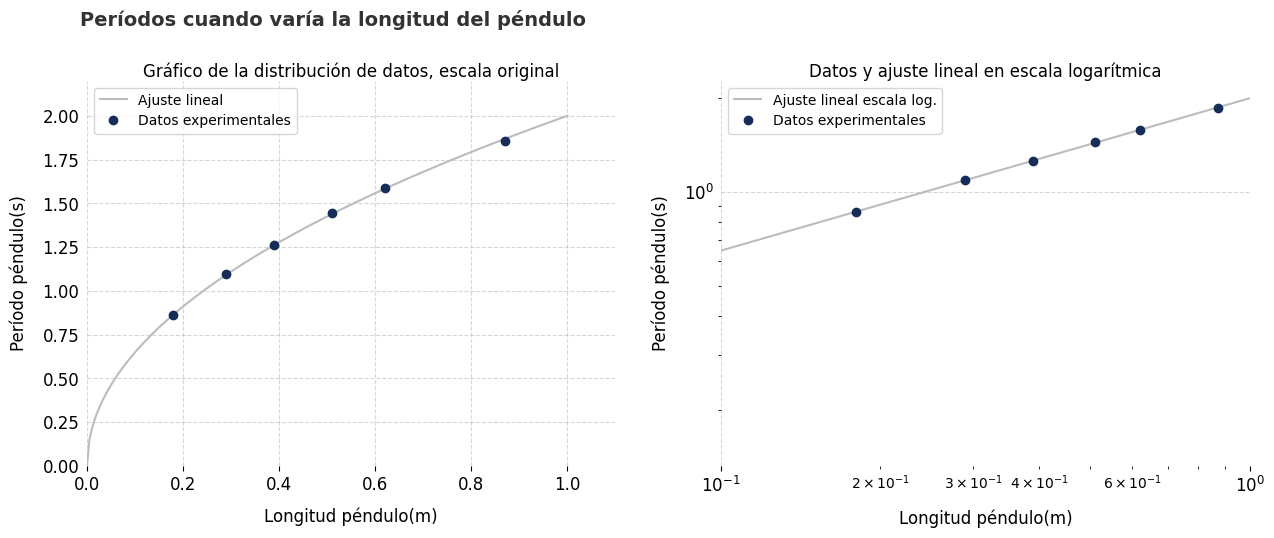

In [41]:
# Función del modelo lineal
def ajuste_lineal_periodo(longitudes, m, b):
    T_periodo = np.exp(b) * (longitudes ** m)
    return T_periodo

longitud_linspace = np.linspace(0, 1, 200)

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 5))

linegraph(x=promedios_periodos['longitud_pendulo'],
        y=promedios_periodos['promedio_periodo'],
        xtitle='Longitud péndulo(m)',
        ytitle='Período péndulo(s)',
        main_title='Períodos cuando varía la longitud del péndulo',
        type_graph='scatter',
        y_variable_label='Datos experimentales',
        ax=ax1)

linegraph(x=longitud_linspace,
        y=ajuste_lineal_periodo(longitud_linspace, m_min_cuadrados, b_min_cuadrados),
        xtitle='Longitud péndulo(m)',
        ytitle='Período péndulo(s)',
        type_graph='plot',
        y_variable_label='Ajuste lineal',
        graph_title='Gráfico de la distribución de datos, escala original',
        ax=ax1)

linegraph(x=promedios_periodos['longitud_pendulo'],
        y=promedios_periodos['promedio_periodo'],
        logscale=True,
        xtitle='Longitud péndulo(m), escala logarítimica',
        ytitle='Período péndulo(s)',
        type_graph='scatter',
        y_variable_label='Datos experimentales',
        ax=ax2)

linegraph(x=longitud_linspace,
        y=ajuste_lineal_periodo(longitud_linspace, m_min_cuadrados, b_min_cuadrados),
        logscale=True,
        xtitle='Longitud péndulo(m)',
        ytitle='Período péndulo(s)',
        type_graph='plot',
        y_variable_label='Ajuste lineal escala log.',
        graph_title='Datos y ajuste lineal en escala logarítmica',
        ax=ax2)

plt.show()

4. **Use propagación de la incertidumbre para determinar el valor de la aceleración con su incertidumbre.**

De la ecuación (3) se tiene que $e^b = C$ y $C = \frac{2 \pi}{\sqrt{g}}$, entonces despejando g de lo anterior que es la aceleración de la gravedad, tenemos:
$$g = \frac{4 \pi^2}{C^2} \Longrightarrow g = \frac{4 \pi^2}{e^{2b}}$$
Así se calcula el valor de la aceleración gravitacional con el método de mínimos cuadrados.

In [42]:
# Cálculo de la gravedad por mínimos cuadrados
g_min_cuadrados = (4 * (np.pi ** 2)) / np.exp(2 * b_min_cuadrados)

# Incertidumbre común

diferencia = promedios_periodos['promedio_periodo'] - ajuste_lineal_periodo(promedios_periodos['longitud_pendulo'], m_min_cuadrados, b_min_cuadrados) # diferencia = Esperado - Predicción
alpha = np.sqrt((1/(len(diferencia) - 2)) * sum(diferencia ** 2))

# Reporte de gravedad y su incertidumbre
print(f'g = ({np.round(g_min_cuadrados, 2)} ±  {np.round(alpha, 2)}) metro/segundo^2')

g = (9.87 ±  0.01) metro/segundo^2


5. **Haga el ajuste (no necesariamente lineal) de los datos, pero ahora usando la función curve_fit() en Python.**

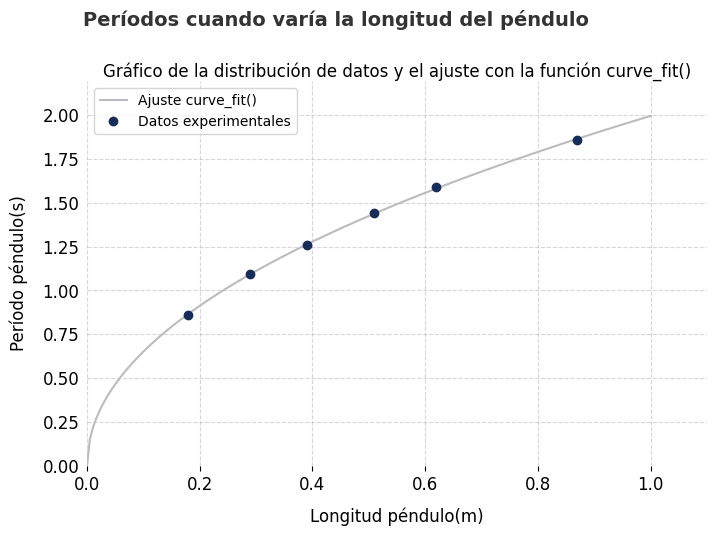

In [43]:
def curve_fit_periodo(long, m_pendiente, b_intercepto):
    return np.exp(b_intercepto) * (long ** m_pendiente)

ajuste_curve_fit, matriz_cov = curve_fit(curve_fit_periodo,
                                     promedios_periodos['longitud_pendulo'],
                                     promedios_periodos['promedio_periodo'])

m_curve_fit, b_curve_fit = ajuste_curve_fit[0], ajuste_curve_fit[1]

longitud_linspace = np.linspace(0, 1, 200)
T_ajustado_curve_fit = ajuste_lineal_periodo(longitud_linspace, m_curve_fit, b_curve_fit)

fig, ax1 = plt.subplots(figsize=(8, 5))

linegraph(x=promedios_periodos['longitud_pendulo'],
        y=promedios_periodos['promedio_periodo'],
        xtitle='Longitud péndulo(m)',
        ytitle='Período péndulo(s)',
        main_title='Períodos cuando varía la longitud del péndulo',
        type_graph='scatter',
        y_variable_label='Datos experimentales',
        ax=ax1)

linegraph(x=longitud_linspace,
        y=T_ajustado_curve_fit,
        xtitle='Longitud péndulo(m)',
        ytitle='Período péndulo(s)',
        type_graph='plot',
        y_variable_label='Ajuste curve_fit()',
        graph_title='Gráfico de la distribución de datos y el ajuste con la función curve_fit()',
        ax=ax1)

In [44]:
g_curve_fit = (4 * (np.pi **2)) / np.exp(b_curve_fit) ** 2
g_error = np.sqrt(matriz_cov[1][1] + matriz_cov[0][0])

print(f'El valor de la pendiente m es: {round(m_curve_fit, 2)} segundo^2/metro')
print(f'El valor del intercepto b es: {round(b_curve_fit, 2)}')
print(f'El valor de la gravedad y su incertidumbre calculada con curve_fit es: ({round(g_curve_fit, 2)} ± {round(g_error, 2)}) metro/segundo^2')

El valor de la pendiente m es: 0.49 segundo^2/metro
El valor del intercepto b es: 0.69
El valor de la gravedad y su incertidumbre calculada con curve_fit es: (9.91 ± 0.01) metro/segundo^2


Ambos análisis, el hecho en el punto 3 y 4, y este hecho en este punto son bastante similares, los valores de pendiente, intercepto y gravedad se ajustan bastante bien a la realidad física. Aún así, el método de mínimos cuadrados tuvo mayor acercamiento al valor real de la aceleración gravitacional en la Tierra.

6. **Compare sus resultados con el valor esperado que está dado por: $$g\ = 9.780327 (1A(l)- B(2l))-(3.086\times{10}^{-6})h\frac{m}{s^2}$$
donde A = 0.0053024 y B =0.0000058.**

También usaré la medida de error relativo porcentual para comparar las medidas: $$\Delta X_\% = \frac{|X_{esperado} - X_{medido}|}{X_{esperado}} 100\%$$

In [45]:
latitud = radians(6.2)
altitud_sobre_mar = 1464
A, B = 0.0053024, 0.0000058
valor_esperado_gravedad = 9.780327 * (1 + (A * latitud) - (B * 2 * latitud)) - (3.086e-6 * altitud_sobre_mar)
valor_esperado_gravedad
deltaX_curve_fit = (abs(valor_esperado_gravedad - g_curve_fit) / valor_esperado_gravedad) * 100
print(f'El valor de la gravedad esperada es de: {round(valor_esperado_gravedad, 2)} metros/segundo^2')
print(f"Error relativo entre la medida esperada y la medida calculada por curve_fit(): {round(deltaX_curve_fit, 2)}%")

deltaX_min_cuadrados = (abs(valor_esperado_gravedad - g_min_cuadrados) / valor_esperado_gravedad) * 100
print(f"Error relativo entre la medida esperada y la medida calculada por método de mínimos cuadrados: {round(deltaX_min_cuadrados, 2)}%")

El valor de la gravedad esperada es de: 9.78 metros/segundo^2
Error relativo entre la medida esperada y la medida calculada por curve_fit(): 1.36%
Error relativo entre la medida esperada y la medida calculada por método de mínimos cuadrados: 0.9%


Estos errores relativos se comparan con los obtenidos en la tarea 2 que fue de 0.75%, aun así, el más aproximado a este valor es el obtenido por método de mínimos cuadrados. Todos los errores relativos son bastante bajos, pero el calculado en la tarea 2 con una sola medida de longitud de péndulo es mucho mejor que los demás, según el análisis.

7. **Use el modelo ajustado y reporte el periodo que tendría un péndulo de 10 m de longitud. Utilice propagación de la incertidumbre para reportar correctamente, (tenga muy presente qué variables son las que tienen incertidumbre en el modelo).**

Para tener en cuenta las variables que tienen incertidumbre en el modelo utilzaré el método de derivadas parciales para propagación de la incertidumbre. En este caso, quedaría expresada así:
$$\Delta T = \frac{\partial T}{\partial l} \Big |_l \cdot \Delta l + \frac{\partial T}{\partial g} \Big |_g \cdot \Delta g$$
Reemplazando aquí la ecuación (1) y derivando se tiene:
$$\Delta T = \frac{\pi}{\sqrt{g l}} \cdot \Delta l - \frac{\pi \sqrt{l}}{\sqrt[3]{g^2}} \cdot \Delta g$$

- Para mínimos cuadrados, reemplazando $l = 10$, $g=9.87$, $\Delta l = 0.01$ y $\Delta g = 0.01$, entonces, $$\Delta T = 0.01$$
- Para curve fit, reemplazando $l = 10$, $g=9.91$, $\Delta l = 0.01$ y $\Delta g = 0.005$, entonces, $$\Delta T = 0.01$$

In [46]:
print('El período de un péndulo de 10 metros será de:')
T_min = ajuste_lineal_periodo(10, m_min_cuadrados, b_min_cuadrados)
print(f'Mínimos cudrados: \n\t({np.round(T_min, 2)} ± 0.04) s')

T_curve = curve_fit_periodo(10, m_curve_fit, b_curve_fit)
print(f'Curve fit:\n\t ({np.round(T_curve, 2)} ± 0.04) s')

El período de un péndulo de 10 metros será de:
Mínimos cudrados: 
	(6.17 ± 0.04) s
Curve fit:
	 (6.11 ± 0.04) s
